## **1. Cài đặt thuật toán**

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def show_image_inline(img, title="Image"):
    """Utility function to display an image in Jupyter using matplotlib."""
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 8))
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [18]:
def l1_distance(x, y):
    return abs(x - y)

def l2_distance(x, y):
    return (x - y) ** 2

In [19]:
def window_based_matching_l1(left_img, right_img, disparity_range, kernel_size=5, save_result=True):
    # Read left, right images then convert to grayscale
    left  = cv2.imread(left_img, 0)
    right = cv2.imread(right_img, 0)

    left  = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]

    # Create blank disparity map
    depth = np.zeros((height, width), np.uint8)

    kernel_half = int((kernel_size - 1) / 2)
    scale = 3
    max_value = 255 * 9

    for y in range(kernel_half, height-kernel_half + 1):
        for x in range(kernel_half, width-kernel_half + 1):

            # Find j where cost has minimum value
            disparity = 0
            cost_min  = 65534

            for j in range(disparity_range):
                total = 0
                value = 0

                for v in range(-kernel_half, kernel_half):
                    for u in range(-kernel_half, kernel_half):
                        value = max_value
                        if (x + u - j) >= 0:
                            value = l1_distance(int(left[y + v, x + u]),  int(right[y + v, (x + u) - j]))
                        total += value

                if total < cost_min:
                    cost_min = total
                    disparity = j

            # Let depth at (y, x) = j (disparity)
            # Multiply by a scale factor for visualization purpose
            depth[y, x] = disparity * scale

    if save_result == True:
        print('Saving result...')
        # Save results
        cv2.imwrite(f'window_based_l1.png', depth)
        cv2.imwrite(f'window_based_l1_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))

    print('Done.')

    return depth

In [20]:
def window_based_matching_l2(left_img, right_img, disparity_range, kernel_size=5, save_result=True):
    # Read left, right images then convert to grayscale
    left  = cv2.imread(left_img, 0)
    right = cv2.imread(right_img, 0)

    left  = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]

    # Create blank disparity map
    depth = np.zeros((height, width), np.uint8)

    kernel_half = int((kernel_size - 1) / 2)
    scale = 3
    max_value = 255 ** 2

    for y in range(kernel_half, height-kernel_half):
        for x in range(kernel_half, width-kernel_half):

            # Find j where cost has minimum value
            disparity = 0
            cost_min  = 65534

            for j in range(disparity_range):
                total = 0
                value = 0

                for v in range(-kernel_half, kernel_half + 1):
                    for u in range(-kernel_half, kernel_half + 1):
                        value = max_value
                        if (x + u - j) >= 0:
                            value = l2_distance(int(left[y + v, x + u]),  int(right[y + v, (x + u) - j]))
                        total += value

                if total < cost_min:
                    cost_min = total
                    disparity = j

            # Let depth at (y, x) = j (disparity)
            # Multiply by a scale factor for visualization purpose
            depth[y, x] = disparity * scale

    if save_result == True:
        print('Saving result...')
        # Save results
        cv2.imwrite(f'window_based_l2.png', depth)
        cv2.imwrite(f'window_based_l2_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))

    print('Done.')

    return depth

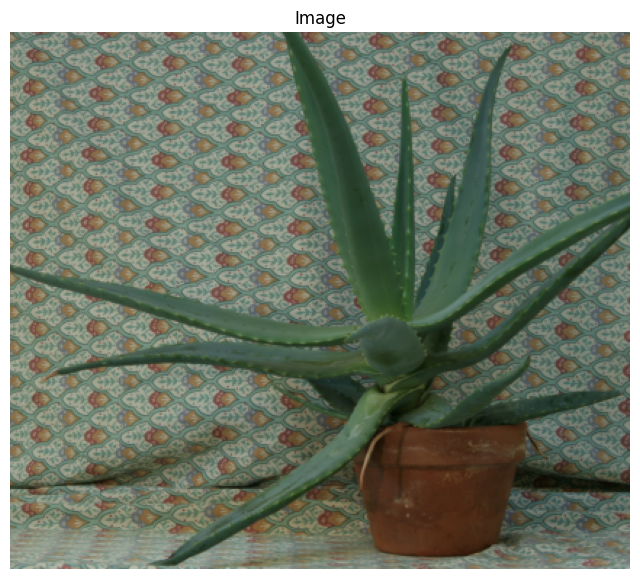

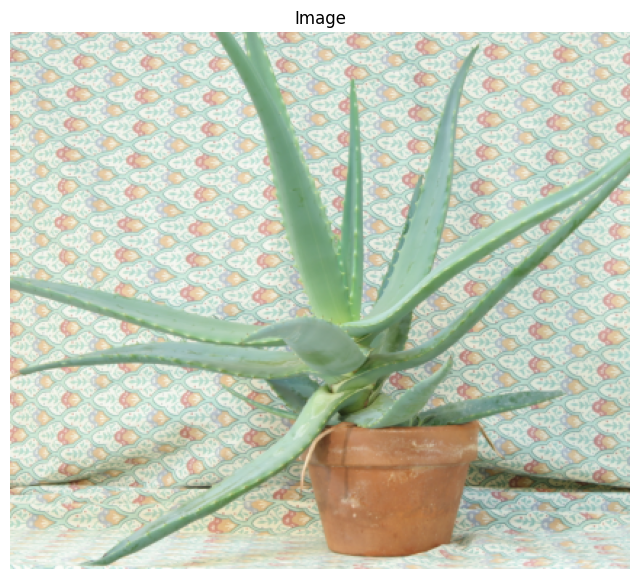

In [21]:
left_img_path = 'Aloe/Aloe_left_1.png'
right_img_path = 'Aloe/Aloe_right_2.png'
disparity_range = 64
kernel_size = 5

left = cv2.imread(left_img_path)
right = cv2.imread(right_img_path)

show_image_inline(left)
show_image_inline(right)

Done.


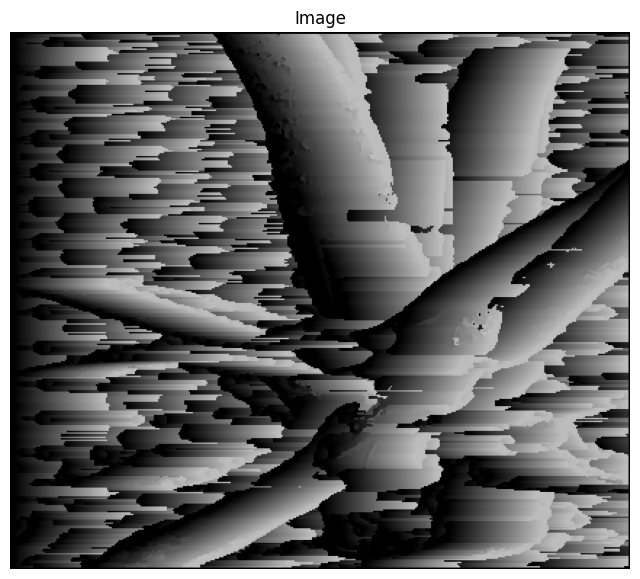

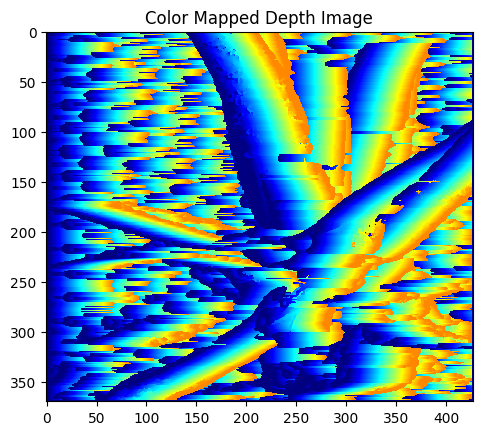

In [22]:
depth = window_based_matching_l1(
    left_img_path,
    right_img_path,
    disparity_range,
    kernel_size=kernel_size,
    save_result=False
)
show_image_inline(depth)
color_mapped_depth = cv2.applyColorMap(depth, cv2.COLORMAP_JET)
plt.imshow(cv2.cvtColor(color_mapped_depth, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper display
plt.title('Color Mapped Depth Image')
plt.show()

Done.


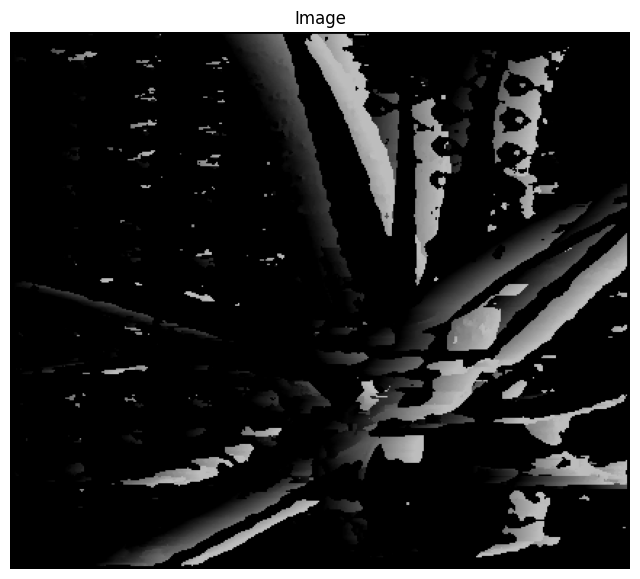

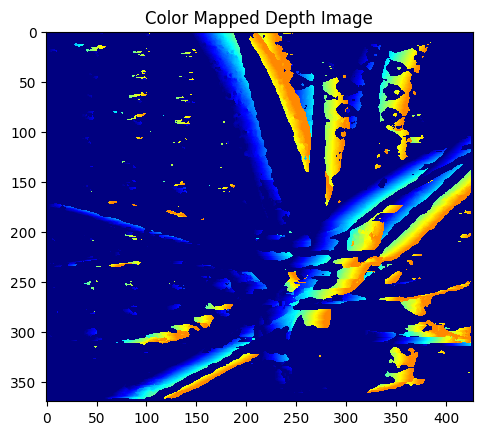

In [23]:
depth2 = window_based_matching_l2(
    left_img_path,
    right_img_path,
    disparity_range,
    kernel_size=kernel_size,
    save_result=False
)
show_image_inline(depth2)
color_mapped_depth = cv2.applyColorMap(depth2, cv2.COLORMAP_JET)
plt.imshow(cv2.cvtColor(color_mapped_depth, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper display
plt.title('Color Mapped Depth Image')
plt.show()

**Note:** Độ đo L1 và L2 không có tính chất 'invariant to linear changes' (như cosine similarity và correlation coefficient). Do đó, L1 L2 sẽ không thể hoạt động tốt với hai ảnh cùng nội dung nhưng có một chút khác biệt liên quan đến độ sáng...